<a href="https://colab.research.google.com/github/Archimedes58/Projects/blob/main/Brain_tumor_Classification_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# show all ouputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import libraries
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# mount the google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# parent directory
parent_dir = "/content/drive/MyDrive/learning cluster/brain_tumors"

# full path
path = os.path.join(parent_dir, "/content/drive/MyDrive/learning cluster/brain_tumors")
# train and test datasets directories


# full paths


In [5]:
train_no_dir = "train/no_tumor"
train_pituitary_dir = "train/pituitary_tumor"
train_meningioma_dir = "train/meningioma_tumor"
train_glioma_dir = "train/glioma_tumor"
test_no_dir = "test/no_tumor"
test_pituitary_dir = "test/pituitary_tumor"
test_meningioma_dir = "test/meningioma_tumor"
test_glioma_dir = "test/glioma_tumor"

In [ ]:
train_no_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor"
train_pituitary_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor"
train_meningioma_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/train/meningioma_tumor"
train_glioma_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/train/glioma_tumor"
test_no_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/test/no_tumor"
test_pituitary_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/test/pituitary_tumor"
test_meningioma_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/test/glioma_tumor"
test_glioma_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/test/glioma_tumor"

In [6]:
print (parent_dir)
print (path)
print (train_no_dir)
print (train_pituitary_dir)
print (train_meningioma_dir)
print (train_glioma_dir)
print (test_no_dir)
print (test_pituitary_dir)
print (test_meningioma_dir)
print (test_glioma_dir)


/content/drive/MyDrive/learning cluster/brain_tumors
/content/drive/MyDrive/learning cluster/brain_tumors
train/no_tumor
train/pituitary_tumor
train/meningioma_tumor
train/glioma_tumor
test/no_tumor
test/pituitary_tumor
test/meningioma_tumor
test/glioma_tumor


In [7]:
path_train_no = os.path.join(parent_dir, train_no_dir)
path_train_pituitary = os.path.join(parent_dir, train_pituitary_dir)
path_train_meningioma = os.path.join(parent_dir, train_meningioma_dir)
path_train_glioma = os.path.join(parent_dir, train_glioma_dir)
path_test_no = os.path.join(parent_dir, test_no_dir)
path_test_pituitary = os.path.join(parent_dir, test_pituitary_dir)
path_test_meningioma = os.path.join(parent_dir, test_meningioma_dir)
path_test_glioma = os.path.join(parent_dir, test_glioma_dir)

In [ ]:
path_train_no = os.path.join(parent_dir, train_no_dir)
path_train_pituitary = os.path.join(parent_dir, train_pituitary_dir)
path_train_meningioma = os.path.join(parent_dir, train_meningioma_dir)
path_train_glioma = os.path.join(parent_dir, train_glioma_dir)
path_test_no = os.path.join(parent_dir, test_no_dir)
path_test_pituitary = os.path.join(parent_dir, test_pituitary_dir)
path_test_meningioma = os.path.join(parent_dir, test_meningioma_dir)
path_test_glioma = os.path.join(parent_dir, test_glioma_dir)

In [15]:
# In cell input-8 where you define the paths
test_no_dir = "test/no_tumor"
test_pituitary_dir = "test/pituitary_tumor"
test_meningioma_dir = "test/meningioma_tumor"
test_glioma_dir = "test/glioma_tumor"

# In cell input-9 where you define the full paths
test_no_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/test/no_tumor"
test_pituitary_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/test/pituitary_tumor"
test_meningioma_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/test/meningioma_tumor" # Corrected the path - it was pointing to glioma_tumor
test_glioma_dir = "/content/drive/MyDrive/learning cluster/brain_tumors/test/glioma_tumor"

# In cell input-10
# ... (rest of the code)

# In cell input-11
flist_test_no = glob.glob(os.path.join(path_test_no, '*.jpg')) # Corrected to use os.path.join
flist_test_pituitary = glob.glob(os.path.join(path_test_pituitary, '*.jpg'))
flist_test_meningioma = glob.glob(os.path.join(path_test_meningioma, '*.jpg'))
flist_test_glioma = glob.glob(os.path.join(path_test_glioma,'*.jpg'))

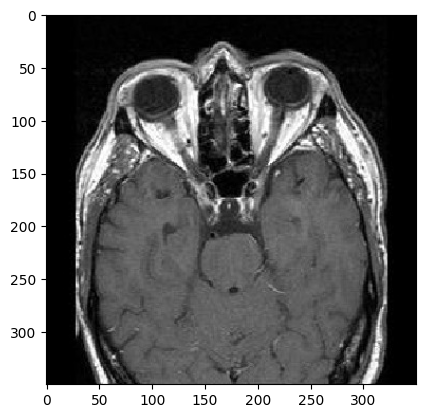

In [16]:
# plot a sample image
some_img = image.imread('/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/1.jpg')
plt.imshow(some_img)


In [9]:
# create a list of filenames for each folder
flist_train_no = glob.glob(os.path.join(path_train_no, '*.jpg'))
flist_train_pituitary = glob.glob(os.path.join(path_train_pituitary, '*.jpg'))
flist_train_meningioma = glob.glob(os.path.join(path_train_meningioma, '*.jpg'))
flist_train_glioma = glob.glob(os.path.join(path_train_glioma, '*.jpg'))
flist_test_no = glob.glob(os.path.join(path_test_no + '*.jpg'))
flist_test_pituitary = glob.glob(os.path.join(path_test_pituitary, '*.jpg'))
flist_test_meningioma = glob.glob(os.path.join(path_test_meningioma, '*.jpg'))
flist_test_glioma = glob.glob(os.path.join(path_test_glioma,'*.jpg'))

In [ ]:
print("Path to 'no_tumor' training images:", path_train_no)

Path to 'no_tumor' training images: /content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor


In [17]:
flist_train_no


['/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/image (46).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/7.jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/image (25).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/image (9).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/image (26).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/1.jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/image (15).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/image(11).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/3.jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/image (52).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/image (22).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/no_tumor/im

In [18]:
flist_train_pituitary

['/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor/p (1).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor/p (100).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor/p (104).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor/p (103).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor/p (10).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor/p (102).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor/p (101).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor/p (138).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor/p (169).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor/p (117).jpg',
 '/content/drive/MyDrive/learning cluster/brain_tumors/train/pituitary_tumor/p (161).jpg',
 '

In [19]:
# define a function to loop through all images in a folder, resize them, and add them to a single numpy array
def images_to_array(filelist):
  images = list()
  for fname in filelist:
    # load an image
    image = load_img(fname, color_mode = "grayscale")
    # resize the image
    image = image.resize((250, 250))
    # convert the image to an array
    image = img_to_array(image)
    # use the squeeze() function to reduce dimensions from (250, 250, 1) to (250, 250)
    image = image.squeeze()
    # append to the images list
    images.append(image)
  # convert the images list to an array
  images = np.array(images)
  return images

In [21]:
# perform the above defined function to process images in each folder
images_train_no = images_to_array(flist_train_no)
images_train_pituitary = images_to_array(flist_train_pituitary)
images_train_meningioma = images_to_array(flist_train_meningioma)
images_train_glioma = images_to_array(flist_train_glioma)
images_test_no = images_to_array(flist_test_no)
images_test_pituitary = images_to_array(flist_test_pituitary)
images_test_meningioma = images_to_array(flist_test_meningioma)
images_test_glioma = images_to_array(flist_test_glioma)

In [22]:
# concatenate arrays to form train and test features
X_train = np.concatenate((images_train_no, images_train_pituitary, images_train_meningioma, images_train_glioma), axis = 0)
X_test = np.concatenate((images_test_no, images_test_pituitary, images_test_meningioma, images_test_glioma), axis = 0)

In [23]:
# take a look at the shapes of X_train and X_test
X_train.shape
print('\n')
X_test.shape

(2870, 250, 250)

(394, 250, 250)

In [35]:
# save X_train and X_test arrays so that we won't have to process the images (which is time consuming) next time the program runs
# save X_train and X_test arrays so that we won't have to process the images (which is time consuming) next time the program runs
np.save('X_train.npy', X_train)  # Save to Colab environment
np.save('X_test.npy', X_test)

In [37]:
# load the saved X_train and X_test numpy arrays
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')

In [38]:
# reshape the above arrays from (obs, 250, 250) to (obs, 62500) because sklearn models usually only accept data with 2 dimensions (i.e., matrix)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# show the reshaped X_train and X_test shapes
X_train.shape
print('\n')
X_test.shape

(2870, 62500)

(394, 62500)

In [39]:
# concatenate arrays to form train and test targets
# 0 - no tumor
# 1 - pituitary tumor
# 2 - meningioma tumor
# 3 - glioma tumor
y_train = np.concatenate((np.full(len(flist_train_no), 0),
                         (np.full(len(flist_train_pituitary), 1)),
                         (np.full(len(flist_train_meningioma), 2)),
                         (np.full(len(flist_train_glioma), 3))),
                         axis = 0)
y_test = np.concatenate((np.full(len(flist_test_no), 0),
                         (np.full(len(flist_test_pituitary), 1)),
                         (np.full(len(flist_test_meningioma), 2)),
                         (np.full(len(flist_test_glioma), 3))),
                         axis = 0)

In [40]:
# show y_train values
unique_values, counts_values = np.unique(y_train), pd.Series(y_train).value_counts()
unique_values
print('\n')
counts_values

# show y_test values
unique_values, counts_values = np.unique(y_test), pd.Series(y_test).value_counts()
unique_values
print('\n')
counts_values

array([0, 1, 2, 3])

,count
1,827
3,826
2,822
0,395


array([0, 1, 2, 3])

,count
2,115
0,105
3,100
1,74


In [41]:
# randomly shuffle the train set
X_train, y_train = shuffle(X_train, y_train, random_state = 42)

In [42]:
# train a binary classifier
y_train_any_tumor = (y_train > 0) # create a binary target for any brain tumor (0: no tumor; 1: any tumor type)
sgd_clf = SGDClassifier(random_state = 42) # stochastic gradient descent (sgd) classifier
sgd_clf.fit(X_train, y_train_any_tumor) # fit the model

SGDClassifier(random_state=42)

(-0.5, 249.5, 249.5, -0.5)

1

array([ True])

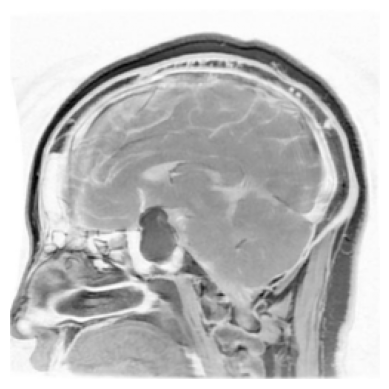

In [43]:
# do a prediction with the fited model
some_img = X_train[0] # get the first instance from the train set
plt.imshow(some_img.reshape(250, 250), cmap = 'binary') # plot the first instance
plt.axis('off')
print('\n')
y_train[0] # true label
y_pred_some_img = sgd_clf.predict([some_img]) # predict the label for the instance
print('\n')
y_pred_some_img

In [44]:
# measure accuracy using cross-validation
cross_val_score(sgd_clf, X_train, y_train_any_tumor, cv = 3, scoring = 'accuracy')

array([0.9153605 , 0.91118077, 0.92677824])

In [45]:
# is the accuracy good? compare it to the baseline tumor rate
sum(y_train_any_tumor)/len(y_train_any_tumor)

0.8623693379790941

In [46]:
# construct a confusion matrix
y_train_pred_any_tumor = cross_val_predict(sgd_clf, X_train, y_train_any_tumor, cv = 3)
confusion_matrix(y_train_any_tumor, y_train_pred_any_tumor)

array([[ 243,  152],
       [  84, 2391]])

In [47]:
# report precision, recall, and f1 score
precision_score(y_train_any_tumor, y_train_pred_any_tumor)
print('\n')
recall_score(y_train_any_tumor, y_train_pred_any_tumor)
print('\n')
f1_score(y_train_any_tumor, y_train_pred_any_tumor)

0.9402280770743217

0.9660606060606061

0.9529693104822639

In [48]:
# decision scores and default threshold
y_score = sgd_clf.decision_function([some_img])
y_score
print('\n')
threshold = 0 # default threshold
y_some_img_pred = (y_score > threshold)
y_some_img_pred

array([45666972.12939472])

array([ True])

In [49]:
# reset threshold
threshold = 70000000
y_some_img_pred = (y_score > threshold)
y_some_img_pred

array([False])

In [50]:
# obtain all decision scores (default method is to predict class, not decision function scores)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_any_tumor,
                             cv = 3, method = 'decision_function')

In [51]:
# obtain the precision recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_any_tumor, y_scores)

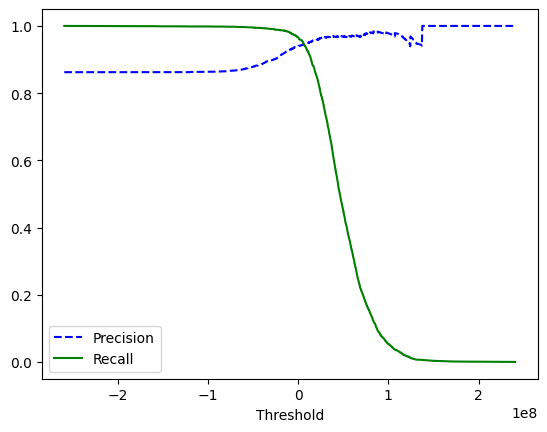

In [52]:
# construct a function to plot precision recall vs threshold curve
def plot_precision_recall_vs_threshold(precisons, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
  plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
  plt.legend()
  plt.xlabel('Threshold')
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) # use the function to plot the curve

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

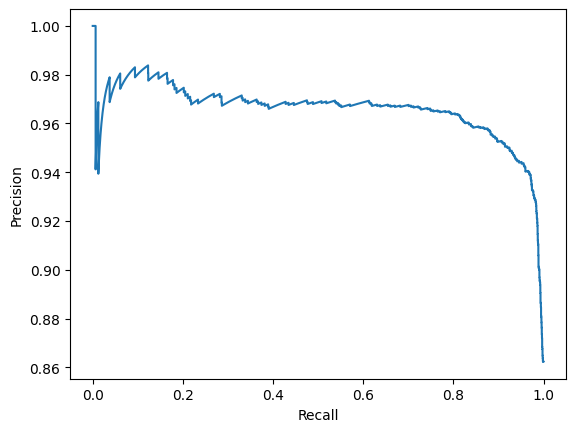

In [53]:
# plot precision vs recall
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [54]:
# obtain the roc curve
y_train_pred_any_tumor_rf = cross_val_predict(sgd_clf, X_train, y_train_any_tumor, cv = 3)
fpr, tpr, thresholds = roc_curve(y_train_any_tumor, y_scores)

<ipython-input-55-ce08c93cd1ce>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


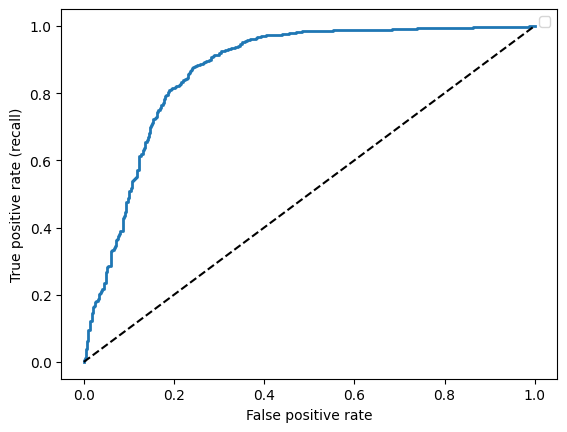

In [55]:
# construct a function to plot roc curve
def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate (recall)')
  plt.legend()
plot_roc_curve(fpr, tpr)

In [56]:
# obtain the auc (area under the curve)
roc_auc_score(y_train_any_tumor, y_train_pred_any_tumor)

0.7906252397391638

In [57]:
# train a random-forest classifier and compare modeling results
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_any_tumor,
                                    cv = 3, method = 'predict_proba')

In [58]:
# y_probas_forest has two columns, proba for negative class and proba for postive class
y_probas_forest
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

array([[0.  , 1.  ],
       [0.02, 0.98],
       [0.04, 0.96],
       ...,
       [0.08, 0.92],
       [0.  , 1.  ],
       [0.  , 1.  ]])

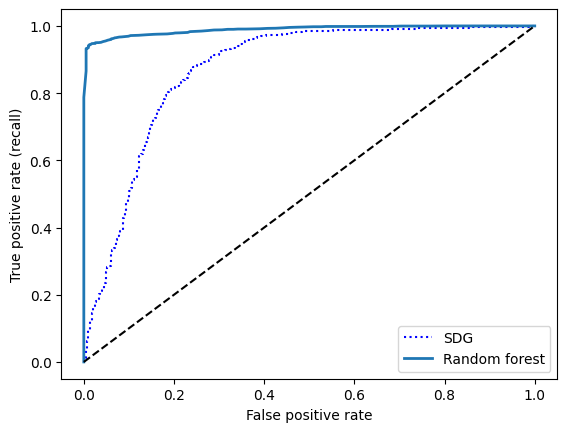

In [59]:
# plot random forest againt sgd in one roc curve graph
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_any_tumor, y_scores_forest)
plt.plot(fpr, tpr, 'b:', label = 'SDG')
plot_roc_curve(fpr_forest, tpr_forest, label = 'Random forest')
plt.legend(loc = 'lower right')

In [60]:
# obtain the auc for the random forest model (area under the curve)
y_train_pred_any_tumor_rf = cross_val_predict(forest_clf, X_train, y_train_any_tumor, cv = 3)
roc_auc_score(y_train_any_tumor, y_train_pred_any_tumor_rf)

0.9418642117376295

In [61]:
# measure accuracy using cross-validation
cross_val_score(forest_clf, X_train, y_train_any_tumor, cv = 3, scoring = 'accuracy')

array([0.96029258, 0.94984326, 0.9707113 ])

In [62]:
# multiclass classification
svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_img])

SVC(random_state=42)

array([1])

In [ ]:
# take a look at the decision scores for each class
some_img_scores = svm_clf.decision_function([some_img])
some_img_scores

array([[ 2.01817959,  3.25902234,  0.87400143, -0.24863707]])

In [ ]:
# the index for the highest score
np.argmax(some_img_scores)
print('\n')
# the corresponding class
svm_clf.classes_[1]

1

1

In [ ]:
# error analysis

# fit transformed data
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

# construct the confusion matrix
sgd_clf = SGDClassifier(random_state = 42)
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[296,  19,  57,  23],
       [  7, 791,  14,  15],
       [ 99,  55, 489, 179],
       [ 15,  19, 111, 681]])

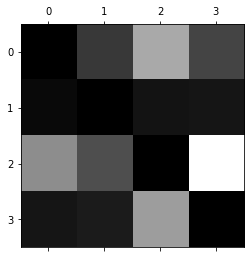

In [ ]:
# plot error distribution in the confusion matrix
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums # normalize the confusion matrix by dividing total observations for each cell
np.fill_diagonal(norm_conf_mx, 0) # set diagnal cells to zero
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)

In [ ]:
# multilabel classification (each label is binary)
# meningioma and pituitary are often benign
# glioma is often malicious
y_train_any_tumor = (y_train > 0) # an indicator for any tumor
y_train_benign = (y_train < 3) # an indicator for benign tumor (including no tumor)
y_multilabel = np.c_[y_train_any_tumor, y_train_benign] # column combine the two labels
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_img])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

array([[ True,  True]])

In [ ]:
# compute the average f1 score cross labels
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = 'macro') # simple average
print('\n')
f1_score(y_multilabel, y_train_knn_pred, average = 'weighted') # weighted average (weighted by instances with each target label)

0.9292930991948688

0.9316582789030573